# Task 1 : IRIS FLOWER CLASSIFICATION

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Reading the dataset and displaying
df = pd.read_csv(r"Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
#Dropping Id Column
df = df.drop(columns = ["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
#Displaying total statistics of the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
#Displaying Different Iris Species Count
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [42]:
df.shape

(150, 5)

In [43]:
#Displaying overall info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Preprocessing the dataset

In [44]:
#Checking if Null values are present in the dataset or not
df.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [45]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Analysis using Histogram

<AxesSubplot:>

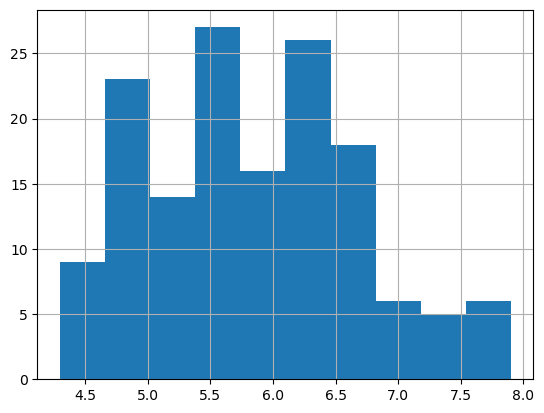

In [46]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

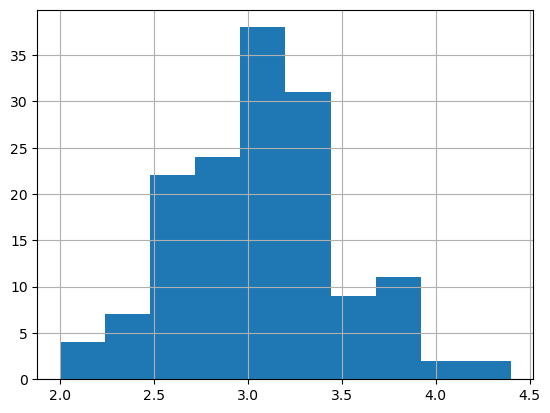

In [47]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

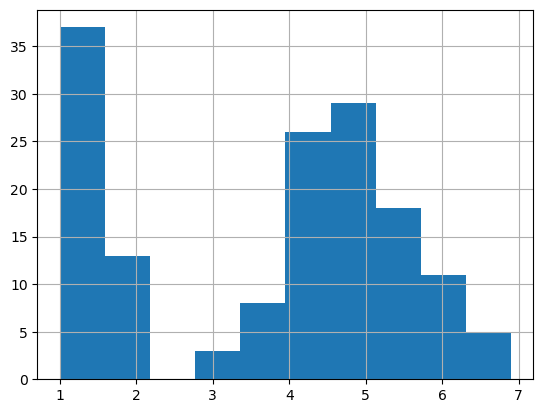

In [48]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

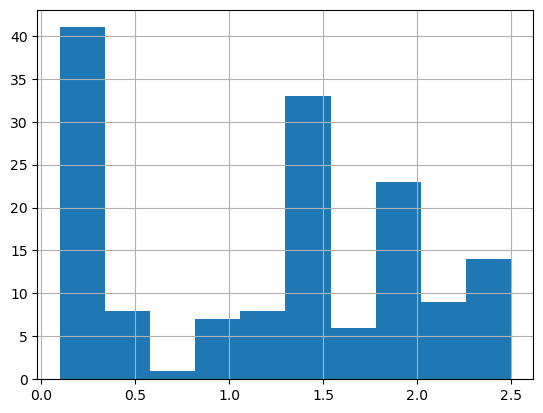

In [49]:
df['PetalWidthCm'].hist()

# Scatterplot

In [50]:
color = ['orange','blue','green']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

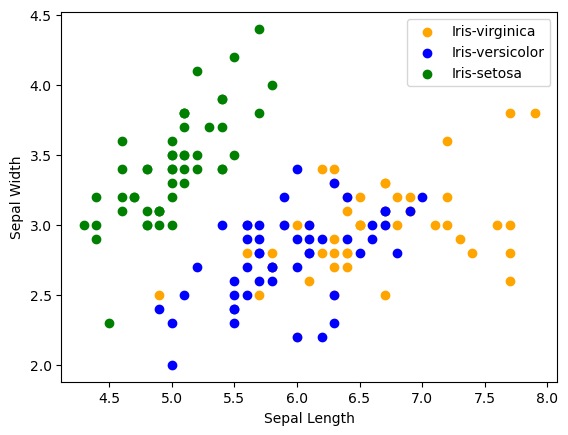

In [51]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = color[i], label = species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

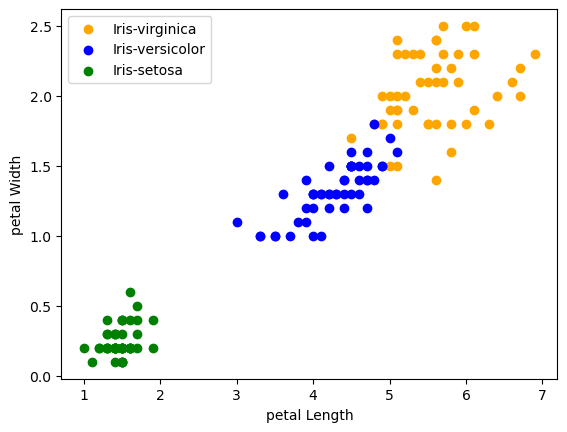

In [52]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = color[i], label = species[i])
    
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()

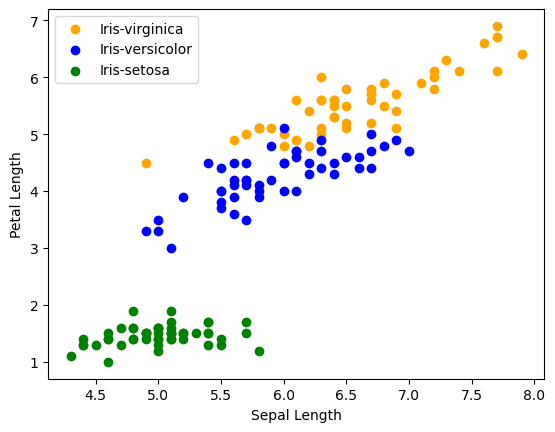

In [53]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = color[i], label = species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

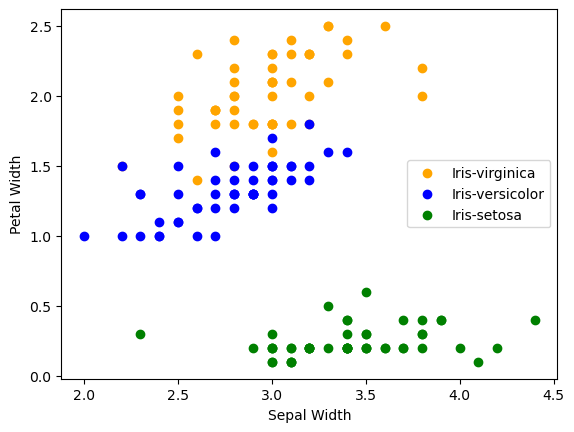

In [54]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = color[i], label = species[i])
    
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Corelation Matrix 

In [55]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

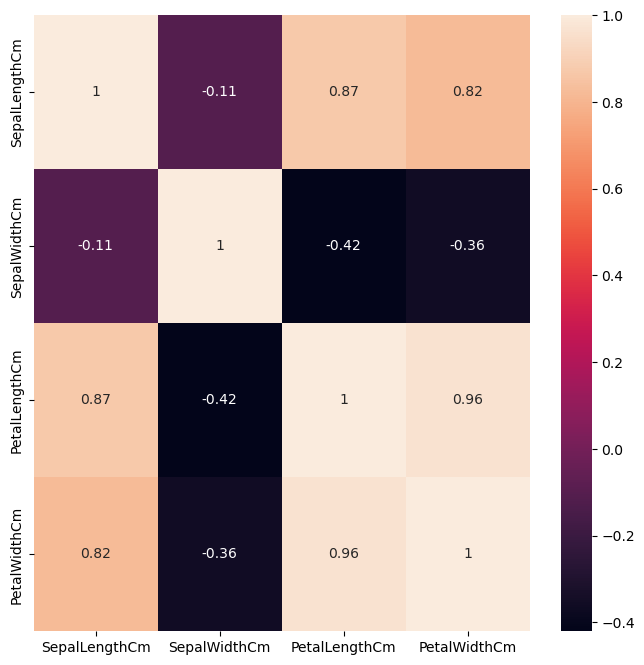

In [56]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr, annot = True, ax = ax)

# Label Encoder

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Training the Model

In [59]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["Species"])
Y = df['Species']
x_train, x_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.25)

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [61]:
model.fit(x_train, y_train)

LogisticRegression()

In [62]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  94.73684210526315


In [63]:
# knn - K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [64]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [65]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.36842105263158


C:\Users\chira\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [67]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [68]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  92.10526315789474


# Received Accuracy of 92.10526315789474